<a href="https://colab.research.google.com/github/mavillan/gb-vpp/blob/main/models/gb-vpp-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

!pip install --upgrade kaggle > /dev/null 2>&1
!mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
!pip uninstall -y tensorflow 
!pip install tensorflow==2.4.3 > /dev/null 2>&1
!pip install tensorflow-addons > /dev/null 2>&1

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import os
from tensorflow.python.profiler import profiler_client
#tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
#print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Tensorflow version 2.4.3
Running on TPU  ['10.68.134.170:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.68.134.170:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.68.134.170:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!mkdir -p input/
!kaggle competitions download -c ventilator-pressure-prediction -p input/ --force

!unzip -o input/sample_submission.csv.zip -d input/
!unzip -o input/train.csv.zip -d input/
!unzip -o input/test.csv.zip -d input/

  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 78.5MB/s]
 99% 138M/139M [00:01<00:00, 125MB/s]
100% 139M/139M [00:01<00:00, 107MB/s]
 92% 69.0M/75.4M [00:00<00:00, 124MB/s]
100% 75.4M/75.4M [00:00<00:00, 128MB/s]
Archive:  input/sample_submission.csv.zip
  inflating: input/sample_submission.csv  
Archive:  input/train.csv.zip
  inflating: input/train.csv         
Archive:  input/test.csv.zip
  inflating: input/test.csv          


In [ ]:
input_path = "input"
subs_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
results_path = "/content/drive/MyDrive/kaggle/gb-vpp/results"
artifacts_path = "/content/drive/MyDrive/kaggle/gb-vpp/artifacts"

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            35G        1.1G         24G        1.1M        9.3G         33G
Swap:            0B          0B          0B


***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

***
## data preparation

In [ ]:
SEQ_LEN = 80

In [ ]:
train_raw = pd.read_csv(f'{input_path}/train.csv')
test_raw = pd.read_csv(f'{input_path}/test.csv')
submission = pd.read_csv(f'{input_path}/sample_submission.csv')

In [ ]:
PRESSURE_VALUES = np.sort(train_raw.pressure.unique())

PRESSURE_MIN = train_raw.pressure.min()
PRESSURE_MAX = train_raw.pressure.max()
PRESSURE_STEP = PRESSURE_VALUES[1]-PRESSURE_VALUES[0]

def pressure_to_idx(array):
    return ((array - PRESSURE_MIN) / PRESSURE_STEP).astype(int)

def idx_to_pressure(array):
    return (array * PRESSURE_STEP) + PRESSURE_MIN

In [ ]:
mapping = {j:i for i,j in enumerate(train_raw.breath_id.unique())}
train_raw["breath_id"] = train_raw.breath_id.map(mapping)

if SEQ_LEN < 80:

    train_raw = (
        train_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(SEQ_LEN)
        .reset_index(drop=True)
    )
    test_raw = (
        test_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(SEQ_LEN)
        .reset_index(drop=True)
    )

In [ ]:
def compute_feats(df):
    
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()

    df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
    df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
    df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()
    df["time_diff"] = df["time_diff"].fillna(method="bfill")
    
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)

    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']

    df['cross']= df['u_in']*df['u_out']
    df['cross2']= df['time_step']*df['u_out']
    
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']

    
    # ohe of R&C values
    df['R_cont'] = df['R'].copy()
    df['C_cont'] = df['C'].copy()

    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['RC'] = df['R']+df['C']
    df = pd.get_dummies(df)

    # time features
    df.drop("time_step", axis=1, inplace=True)

    return df

train = compute_feats(train_raw)
test = compute_feats(test_raw)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 53 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   breath_id                  int64  
 2   u_in                       float64
 3   u_out                      int64  
 4   pressure                   float64
 5   area                       float64
 6   time_diff                  float64
 7   vol_diff                   float64
 8   vol_diff_cumsum            float64
 9   u_in_cumsum                float64
 10  u_in_cummean               float64
 11  u_in_lag1                  float64
 12  u_in_lag2                  float64
 13  u_in_lag3                  float64
 14  u_in_lag4                  float64
 15  u_in_lag_back1             float64
 16  u_in_lag_back2             float64
 17  u_in_lag_back3             float64
 18  u_in_lag_back4             float64
 19  u_out_lag1                 float64
 20  u_

In [ ]:
#def compute_feats(df):
#     df = df.copy()

#     # time features
#     df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
#     df['time_since_expiratory']= df['time_step']*df['u_out']

#     # lag features
#     lags = [1,2,3,4,5]
#     for lag in lags:
#         df[f"u_in_lag{lag}p"] = df.groupby("breath_id")["u_in"].shift(lag).fillna(0)
#         df[f"u_in_lag{lag}m"] = df.groupby("breath_id")["u_in"].shift(-lag).fillna(0)

#     # diff features
#     df['u_in_diff1'] = df.eval('u_in - u_in_lag1p')
#     df['u_in_diff2'] = df.eval('u_in - u_in_lag2p')
#     df['u_in_diff3'] = df.eval('u_in - u_in_lag3p')
#     df['u_in_diff4'] = df.eval('u_in - u_in_lag4p')
#     df['u_in_diff5'] = df.eval('u_in - u_in_lag5p')

#     # stats on u_in
#     df["u_in_cumsum"] = df.groupby("breath_id")["u_in"].cumsum()
#     df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)

#     df['u_in_first'] = df.groupby('breath_id')['u_in'].transform('first')
#     df['u_in_last'] = df.groupby('breath_id')['u_in'].transform('last')

#     df['u_in_1st_half'] = df['u_in'] * (1 - df['u_out'])
#     df['u_in_2nd_half'] = df['u_in'] * df['u_out']

#     df['u_in_max'] = df.groupby(['breath_id'])['u_in'].transform('max')        
#     df['u_in_diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    
#     df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
#     df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()

#     # gradients of u_in
#     def compute_grad_1st(df):
#         return np.gradient(df.u_in, 100*df.time_step)
#     def compute_grad_2nd(df):
#         return np.gradient(df.ugrad_d1, 100*df.time_step)

#     gb_result = df.groupby("breath_id").apply(compute_grad_1st)
#     df["ugrad_d1"] = np.concatenate(gb_result.values)
#     gb_result = df.groupby("breath_id").apply(compute_grad_2nd)
#     df["ugrad_d2"] = np.concatenate(gb_result.values)

#     # lags on gradients
#     for lag in lags:
#         df[f"ugrad_d1_lag{lag}p"] = df.groupby("breath_id")["ugrad_d1"].shift(lag).fillna(0)
#         df[f"ugrad_d2_lag{lag}p"] = df.groupby("breath_id")["ugrad_d2"].shift(lag).fillna(0)

#     # nan filling
#     df["time_diff"] = df["time_diff"].fillna(method="bfill")

#     # Features on R&C values
#     df['R/C'] = df.eval("R/C")
#     df['C/R'] = df.eval("C/R")
    
#     # ohe of R&C values    
#     df['R_categ'] = df['R'].astype(str)
#     df['C_categ'] = df['C'].astype(str)
#     df = pd.get_dummies(df)

#     # delete features
#     df.drop("time_step", axis=1, inplace=True)

#     return df

# train = compute_feats(train_raw)
# test  = compute_feats(test_raw)

In [ ]:
targets = train[['pressure']].to_numpy().reshape(-1, SEQ_LEN)

cols_to_exclude_train = ["id","breath_id","pressure"]
cols_to_exclude_test = ["id","breath_id",]

train.drop(cols_to_exclude_train, axis=1, inplace=True)
test.drop(cols_to_exclude_test, axis=1, inplace=True)

In [ ]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

train = train.reshape(-1,SEQ_LEN,train.shape[1])
test =  test.reshape(-1,SEQ_LEN,train.shape[2])

***
## model training

In [ ]:
#class OutputLayer(tf.keras.layers.Layer):
#    def __init__(self):
#        super(OutputLayer, self).__init__()
#        self.pressure = tf.convert_to_tensor(
#            PRESSURE_VALUES.reshape((1,1,950)),
#            dtype = tf.dtypes.float32
#        )

#    def call(self, inputs):
#        #out = tf.nn.softmax(inputs, axis=2)
#        out = tfa.activations.sparsemax(inputs, axis=2)
#        return tf.reduce_sum(out*self.pressure, axis=-1)

def build_model(input_dim):
    with tpu_strategy.scope():   
        inputs = layers.Input(shape = input_dim)

        #h1 = layers.Dense(256, activation = 'selu')(inputs)
        #h2 = layers.Dense(512, activation = 'selu')(h1)
        #h3 = layers.Dense(1024, activation = 'swish')(h2)
    
        h1 = layers.Bidirectional(layers.LSTM(1024, return_sequences=True, ))(inputs)
        #h1 = tf.keras.layers.BatchNormalization()(h1)

        h2 = layers.Bidirectional(layers.LSTM(512, return_sequences=True, ))(h1)
        #h2 = tf.keras.layers.BatchNormalization()(h2)

        h3 = layers.Bidirectional(layers.LSTM(256, return_sequences=True, ))(h2)
        #h3 = tf.keras.layers.BatchNormalization()(h3)

        h4 = layers.Bidirectional(layers.LSTM(128, return_sequences=True, ))(h3)
        #h4 = tf.keras.layers.BatchNormalization()(h4)

        out = layers.Dense(128, activation = 'selu')(h4)
        output = layers.Dense(1)(out)

        #out1 = layers.Bidirectional(layers.LSTM(1, return_sequences=True, activation="linear"))(h4)
        #out2 = layers.Bidirectional(layers.LSTM(1, return_sequences=True, activation="linear"))(h4)
        #output = tf.math.reduce_sum(out1 * tf.nn.softmax(out2, axis=-1), axis=-1)
        
        model = keras.Model(inputs, output)
        model.compile(optimizer="adam", loss="mae")
           
    return model    

In [ ]:
# def build_model(input_dim):
#     with tpu_strategy.scope():   
#         inputs = layers.Input(shape = input_dim)
    
#         h1 = layers.Bidirectional(layers.LSTM(384, return_sequences=True, ))(inputs)
#         h2 = layers.Bidirectional(layers.LSTM(384, return_sequences=True, ))(h1)
#         h3 = layers.Bidirectional(layers.LSTM(384, return_sequences=True, ))(h2)
#         h4 = layers.Bidirectional(layers.LSTM(384, return_sequences=True, ))(h3) 

#         m1 = layers.Bidirectional(layers.LSTM(1, return_sequences=True))(inputs)
#         m1 = tf.math.reduce_sum(m1, axis=2, keepdims=True)
#         m2 = layers.Bidirectional(layers.LSTM(1, return_sequences=True))(inputs)
#         m2 = tf.math.reduce_sum(m2, axis=2, keepdims=True)
#         m3 = layers.Bidirectional(layers.LSTM(1, return_sequences=True))(inputs)
#         m3 = tf.math.reduce_sum(m3, axis=2, keepdims=True)
#         m4 = layers.Bidirectional(layers.LSTM(1, return_sequences=True))(inputs)
#         m4 = tf.math.reduce_sum(m4, axis=2, keepdims=True)

#         logits = tf.concat([m1,m2,m3,m4], axis=2)
#         att = tf.nn.softmax(logits, axis=2)

#         hidden = h1*tf.expand_dims(att[:,:,0], axis=2) + h2*tf.expand_dims(att[:,:,1], axis=2) + h3*tf.expand_dims(att[:,:,2], axis=2) + h4*tf.expand_dims(att[:,:,3], axis=2)

#         out = layers.Dense(128, activation = 'selu')(hidden)
#         out = layers.Dense(1)(out)
        
#         model = keras.Model(inputs, out)
#         model.compile(optimizer="adam", loss="mae")
           
#     return model 

----------------------------------- Fold: 1 ------------------------------------
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 50)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 2048)          8806400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 80, 1024)          10489856  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 80, 512)           2623488   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 80, 256)           656384    
_________________________________________________________________
dense (Dense)                (None, 80, 128)           32896     
______________________________________________

None

Epoch 1/300
59/59 [==============================] - 70s 678ms/step - loss: 4.1459 - val_loss: 1.4231
Epoch 2/300
59/59 [==============================] - 12s 206ms/step - loss: 1.2170 - val_loss: 0.7908
Epoch 3/300
59/59 [==============================] - 12s 206ms/step - loss: 0.7551 - val_loss: 0.5873
Epoch 4/300
59/59 [==============================] - 12s 207ms/step - loss: 0.6077 - val_loss: 0.5639
Epoch 5/300
59/59 [==============================] - 12s 206ms/step - loss: 0.5359 - val_loss: 0.4840
Epoch 6/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4844 - val_loss: 0.4780
Epoch 7/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4550 - val_loss: 0.4190
Epoch 8/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4433 - val_loss: 0.3991
Epoch 9/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4137 - val_loss: 0.4096
Epoch 10/300
59/59 [==============================] - 12s 207ms/step - loss: 0.391

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold0/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold0/assets


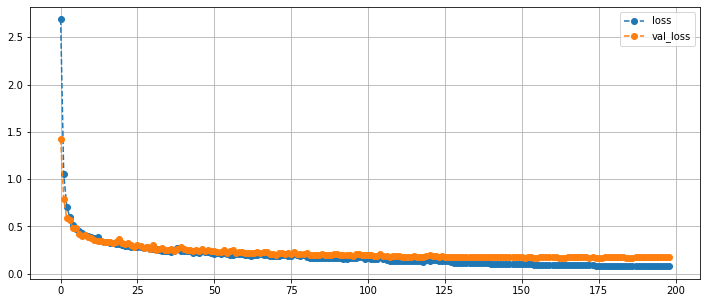

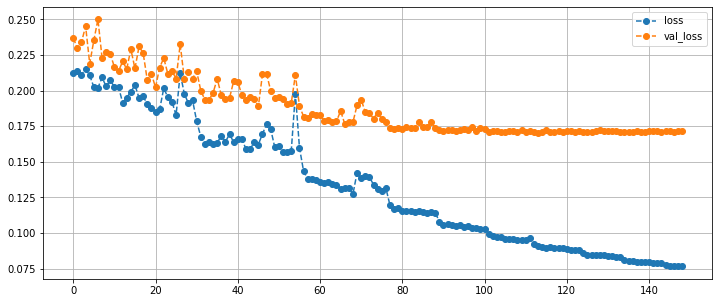

----------------------------------- Fold: 2 ------------------------------------
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 50)]          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 80, 2048)          8806400   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 80, 1024)          10489856  
_________________________________________________________________
bidirectional_6 (Bidirection (None, 80, 512)           2623488   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 80, 256)           656384    
_________________________________________________________________
dense_2 (Dense)              (None, 80, 128)           32896     
____________________________________________

None

Epoch 1/300
59/59 [==============================] - 69s 688ms/step - loss: 4.3510 - val_loss: 1.4112
Epoch 2/300
59/59 [==============================] - 12s 206ms/step - loss: 1.1908 - val_loss: 0.8035
Epoch 3/300
59/59 [==============================] - 12s 206ms/step - loss: 0.7571 - val_loss: 0.6335
Epoch 4/300
59/59 [==============================] - 12s 206ms/step - loss: 0.6399 - val_loss: 0.5808
Epoch 5/300
59/59 [==============================] - 12s 205ms/step - loss: 0.5611 - val_loss: 0.5521
Epoch 6/300
59/59 [==============================] - 12s 206ms/step - loss: 0.5198 - val_loss: 0.5352
Epoch 7/300
59/59 [==============================] - 12s 205ms/step - loss: 0.4841 - val_loss: 0.4338
Epoch 8/300
59/59 [==============================] - 12s 205ms/step - loss: 0.4419 - val_loss: 0.4837
Epoch 9/300
59/59 [==============================] - 12s 205ms/step - loss: 0.4325 - val_loss: 0.4517
Epoch 10/300
59/59 [==============================] - 12s 206ms/step - loss: 0.405

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold1/assets


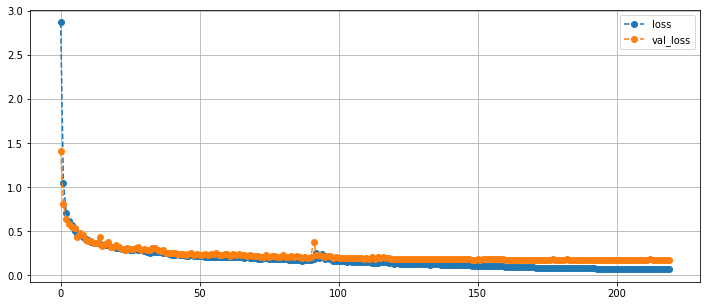

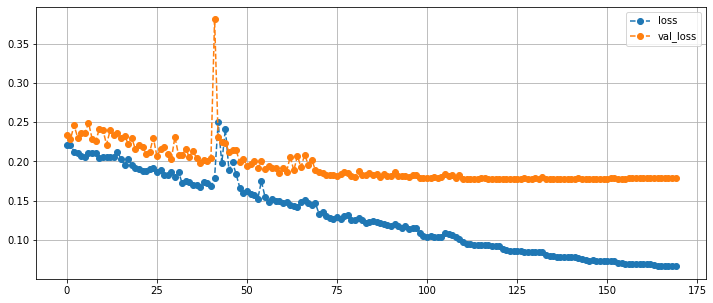

----------------------------------- Fold: 3 ------------------------------------
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 50)]          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 80, 2048)          8806400   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 80, 1024)          10489856  
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 80, 512)           2623488   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 80, 256)           656384    
_________________________________________________________________
dense_4 (Dense)              (None, 80, 128)           32896     
____________________________________________

None

Epoch 1/300
59/59 [==============================] - 68s 667ms/step - loss: 4.3773 - val_loss: 1.6107
Epoch 2/300
59/59 [==============================] - 12s 207ms/step - loss: 1.2636 - val_loss: 0.8329
Epoch 3/300
59/59 [==============================] - 12s 207ms/step - loss: 0.7571 - val_loss: 0.6095
Epoch 4/300
59/59 [==============================] - 12s 206ms/step - loss: 0.6081 - val_loss: 0.5169
Epoch 5/300
59/59 [==============================] - 12s 206ms/step - loss: 0.5571 - val_loss: 0.4691
Epoch 6/300
59/59 [==============================] - 12s 207ms/step - loss: 0.5114 - val_loss: 0.4687
Epoch 7/300
59/59 [==============================] - 12s 206ms/step - loss: 0.4590 - val_loss: 0.4599
Epoch 8/300
59/59 [==============================] - 12s 206ms/step - loss: 0.4330 - val_loss: 0.4078
Epoch 9/300
59/59 [==============================] - 12s 206ms/step - loss: 0.4040 - val_loss: 0.3893
Epoch 10/300
59/59 [==============================] - 12s 207ms/step - loss: 0.398

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold2/assets


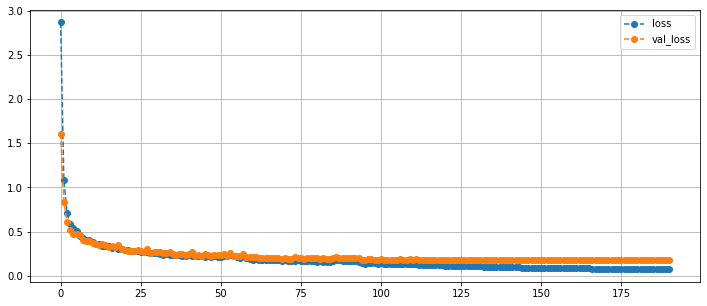

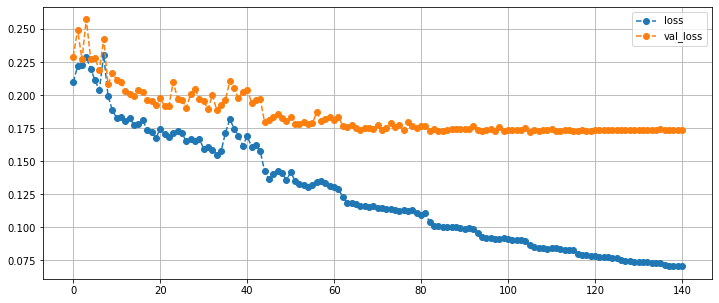

----------------------------------- Fold: 4 ------------------------------------
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80, 50)]          0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 80, 2048)          8806400   
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 80, 1024)          10489856  
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 80, 512)           2623488   
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 80, 256)           656384    
_________________________________________________________________
dense_6 (Dense)              (None, 80, 128)           32896     
____________________________________________

None

Epoch 1/300
59/59 [==============================] - 69s 669ms/step - loss: 4.1100 - val_loss: 1.0611
Epoch 2/300
59/59 [==============================] - 12s 207ms/step - loss: 1.0317 - val_loss: 0.6944
Epoch 3/300
59/59 [==============================] - 12s 207ms/step - loss: 0.6937 - val_loss: 0.5938
Epoch 4/300
59/59 [==============================] - 12s 207ms/step - loss: 0.5976 - val_loss: 0.5817
Epoch 5/300
59/59 [==============================] - 12s 207ms/step - loss: 0.5137 - val_loss: 0.4690
Epoch 6/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4793 - val_loss: 0.4737
Epoch 7/300
59/59 [==============================] - 12s 206ms/step - loss: 0.4491 - val_loss: 0.4939
Epoch 8/300
59/59 [==============================] - 15s 254ms/step - loss: 0.4361 - val_loss: 0.4500
Epoch 9/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4121 - val_loss: 0.3981
Epoch 10/300
59/59 [==============================] - 12s 207ms/step - loss: 0.388

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold3/assets


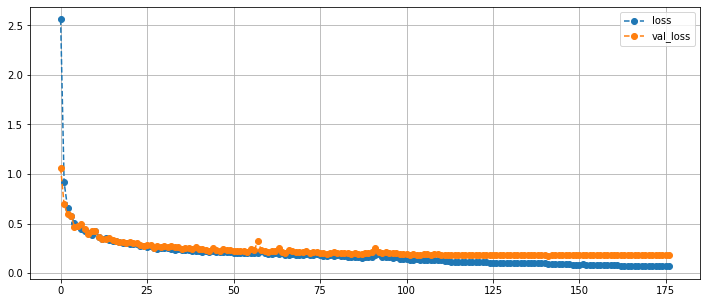

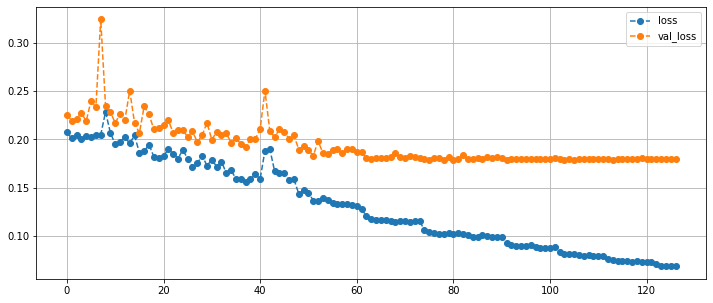

----------------------------------- Fold: 5 ------------------------------------
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 80, 50)]          0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 80, 2048)          8806400   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 80, 1024)          10489856  
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 80, 512)           2623488   
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 80, 256)           656384    
_________________________________________________________________
dense_8 (Dense)              (None, 80, 128)           32896     
____________________________________________

None

Epoch 1/300
59/59 [==============================] - 71s 668ms/step - loss: 4.1384 - val_loss: 1.2659
Epoch 2/300
59/59 [==============================] - 12s 207ms/step - loss: 1.0793 - val_loss: 0.7343
Epoch 3/300
59/59 [==============================] - 12s 207ms/step - loss: 0.7004 - val_loss: 0.6034
Epoch 4/300
59/59 [==============================] - 12s 206ms/step - loss: 0.5814 - val_loss: 0.5006
Epoch 5/300
59/59 [==============================] - 12s 207ms/step - loss: 0.5086 - val_loss: 0.5076
Epoch 6/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4844 - val_loss: 0.4348
Epoch 7/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4540 - val_loss: 0.4759
Epoch 8/300
59/59 [==============================] - 12s 207ms/step - loss: 0.4347 - val_loss: 0.3913
Epoch 9/300
59/59 [==============================] - 12s 208ms/step - loss: 0.4063 - val_loss: 0.3907
Epoch 10/300
59/59 [==============================] - 12s 207ms/step - loss: 0.396

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm_fold4/assets


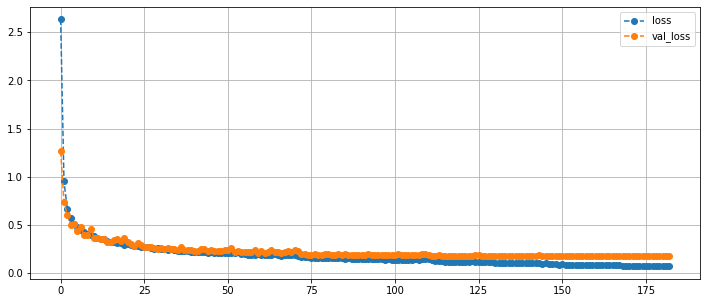

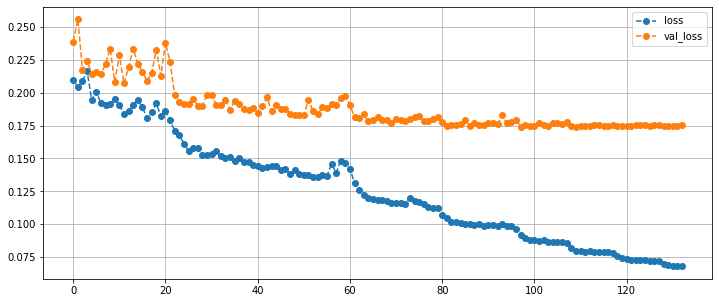

In [ ]:
EPOCH = 300
BATCH_SIZE = 1024
INIT_LR = 1e-4
MAX_LR = 1e-2

kf = KFold(n_splits=5, shuffle=True, random_state=19)
models_by_fold = list()

oof = train_raw[["id","breath_id","u_out","pressure"]].copy()

for fold, (train_idx,valid_idx) in enumerate(kf.split(train, targets)):

    print(f" Fold: {fold+1} ".center(80, "-"))
    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = targets[train_idx], targets[valid_idx]

    #scheduler = ExponentialDecay(
    #    initial_learning_rate=1e-3, 
    #    decay_steps=EPOCH*((len(train)*0.8)/BATCH_SIZE), 
    #    decay_rate=1e-5
    #)
    #lr = LearningRateScheduler(scheduler, verbose=1)
    #lr = OneCycleScheduler(
    #    lr_max = 1e-3,
    #    steps = EPOCH*(X_train.shape[0]/BATCH_SIZE),
    #    phase_1_pct = 0.2,
    #    init_div_factor = 1e1,
    #    final_div_factor = 1e2,
    #)

    #steps_per_epoch = (len(X_train) // BATCH_SIZE) + 1
    #clr = tfa.optimizers.CyclicalLearningRate(
    #    initial_learning_rate = INIT_LR,
    #    maximal_learning_rate = MAX_LR,
    #    scale_fn = lambda x: (0.8)**(x-1),
    #    step_size = 10*steps_per_epoch
    #)

    lr = ReduceLROnPlateau(
        monitor="val_loss", 
        factor=0.75, 
        patience=10, 
        verbose=1
    )
    es = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        patience=35, 
        verbose=1,
        restore_best_weights=True,
    )

    model = build_model(
        input_dim=train.shape[-2:],
    )
    display(model.summary())

    history = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_valid, y_valid), 
        epochs=EPOCH, 
        batch_size=BATCH_SIZE, 
        callbacks=[lr,es],
        shuffle=True,
        verbose=1,
    )
    models_by_fold.append(model)

    save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    model.save(f"{artifacts_path}/lstm_fold{fold}", options=save_locally)

    # generate the oof predictions
    x_valid_tf = tf.convert_to_tensor(X_valid, dtype=tf.float32)
    oof_preds = model.call(x_valid_tf, training=False).numpy().squeeze()
    idx = oof.query("breath_id in @valid_idx").index
    oof.loc[idx, "pred"] = oof_preds.ravel()

    plt.figure(figsize=(12,5))
    plt.plot(history.history["loss"], "o--", label="loss")
    plt.plot(history.history["val_loss"], "o--", label="val_loss")
    plt.grid()
    plt.legend(loc="best")
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.plot(history.history["loss"][50:], "o--", label="loss")
    plt.plot(history.history["val_loss"][50:], "o--", label="val_loss")
    plt.grid()
    plt.legend(loc="best")
    plt.show()


***
Testing features
- base features (epoch: 143) - val_loss: 0.1772
- Removed out_lag and out_diff feats (epoch: 144) - val_loss: 0.1788
- Removes only out_diff feats (epoch: 173) - val_loss: 0.1762 **(keep)**
- Removes dups feats & breath_id__u_in__diffmean (epoch: 140) - val_loss: 0.1794
- Adds u_in_cummean (epoch: 169) - val_loss: 0.1757 **(keep)**
- Dropped time_step (epoch: 129) - val_loss: 0.1745 **(keep)**
- Adds time_diff (epoch: 155) - val_loss: 0.1743 **(keep)**
- Adds ugrad_1d & ugrad_2d (epoch: 189) - val_loss: 0.1763
- Removes area features & includes vol_diff (epoch: 166) - val_loss: 0.1747 **(keep)**
- Adds u_in_hardcoded & fix in u_in (epoch: 189) - val_loss: 0.1756

***
Testing regularizers
- BatchNorm (all layers) -> 0.1814 (epoch 215)

***
Testing optimizers
- Adam (epochs 120-155): 0.1745
- Adadelta (epochs 300- 300): 0.88
- Adamax (epochs 155- 190): 0.1828
- Nadam (epochs 134 - 169): 0.1877
- RMSProp (epoch 158 - 193): 0.2036 

---
Testing dropout
- Base (without recurrent_dropout) -> 0.1734

Ideas that worked:
- (recurrent_dropout=0.1) 1024-512-256-128 -> 0.1707
- (recurrent_dropout=0.1) 512-512-256-256  -> 0.1724
- (recurrent_dropout=0.1) 512-512-512-512 -> 0.1730
- lstm with att 384-384-384-384           -> 0.1747
- (recurrent_dropout=0.2) 1024-512-256-128 -> 0.1719


In [ ]:
print("mae:", oof.eval("abs(pressure - pred)").mean())
print("mae inspiratory:", oof.query("u_out == 0").eval("abs(pressure - pred)").mean())
print("mae expiratory :", oof.query("u_out == 1").eval("abs(pressure - pred)").mean())

mae: 0.1720145184994679
mae inspiratory: 0.18576625285578008
mae expiratory : 0.163602098163792


lstm_v8
- mae: 0.17110353834650535
- mae inspiratory: 0.18361930380653205
- mae expiratory : 0.1634472037239466

lstm_v7
- mae: 0.17478381765716353
- mae inspiratory: 0.1884791864930153
- mae expiratory : 0.16640587809591878

lstm_v6
- mae: 0.1700748569735916
- mae inspiratory: 0.18324426831174476
- mae expiratory : 0.16202780215683016

lstm_v5
- mae: 0.19870362716674497
- mae inspiratory: 0.24693164942887788
- mae expiratory : 0.169200847028661

lstm_v4
- mae: 0.19910630745529212
- mae inspiratory: 0.24139623415898287
- mae expiratory : 0.1732360695506279

lstm_v3
- mae: 0.1894350191416654
- mae inspiratory: 0.22527142074094628
- mae expiratory : 0.16751262988059495

lstm_v2
- mae: 0.20938487189579605
- mae inspiratory: 0.2124941942660988
- mae expiratory : 0.19958701148249222

lstm_v1
- mae: 0.18086928169783648
- mae inpiratory: 0.2031012730817264
- mae expiratory: 0.16726918940573152

***
## sub generation

In [ ]:
all_preds = list()
test_tf = tf.convert_to_tensor(test, dtype=tf.float32)

for model in models_by_fold:
    preds = model.call(test_tf, training=False).numpy().squeeze().ravel()
    all_preds.append(preds)

test_raw["pressure"] = np.median(all_preds, axis=0)

In [ ]:
# saves final sub
sub = pd.merge(submission["id"], test_raw[["id","pressure"]], how="left", on="id")
sub["pressure"] = sub["pressure"].fillna(0)
sub.to_csv(f"{subs_path}/sub_lstm.csv", index=False)

# clip predictions to discrete values
all_pressure = np.sort(train_raw.pressure.unique())
PRESSURE_MIN = all_pressure[0]
PRESSURE_MAX = all_pressure[-1]
PRESSURE_STEP = all_pressure[1]-all_pressure[0]

sub["pressure"] =\
    np.round( (sub.pressure - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
sub.pressure = np.clip(sub.pressure, PRESSURE_MIN, PRESSURE_MAX)
sub.to_csv(f"{subs_path}/sub_lstm_clip.csv", index=False)

In [ ]:
# saves oof preds
oof.to_csv(f"{results_path}/oof_lstm.csv", index=False)

In [ ]:
# saves each model preds (pseudo labels)
for fold,preds in enumerate(all_preds):
    _sub = submission.copy()
    _test = test_raw[["id","pressure"]].copy()
    _test["pressure"] = preds
    _sub = pd.merge(_sub["id"], _test[["id","pressure"]], how="left", on="id")
    _sub["pressure"] = _sub["pressure"].fillna(0)
    _sub.to_csv(f"{results_path}/plabels_lstm_{fold}.csv", index=False)

***